In [5]:
import pandas as pd
import numpy as np

In [7]:
ark_data = pd.read_csv('https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [8]:
ark_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
ark_data.rename(columns={'sales':'dept'}, inplace=True)

In [11]:
ark_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


In [17]:
ark_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


ARK DATA PREPROCESSING 

In [19]:
ark_data.select_dtypes('object').columns

Index(['dept', 'salary'], dtype='object')

In [20]:
ark_data.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [44]:
le = LabelEncoder()

In [51]:
dept = le.fit_transform(ark_data.dept)

In [52]:
mark = OneHotEncoder()

In [53]:
mark_dept = mark.fit_transform(dept.reshape(-1,1))

In [54]:
mark.get_feature_names_out()

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7',
       'x0_8', 'x0_9'], dtype=object)

In [55]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [56]:
dept_df = pd.DataFrame(mark_dept.toarray(), dtype=int,columns=le.classes_)

In [57]:
ark_data['salary_tf'] = ark_data.salary.map({'low':1,'medium':2,'high':3})

In [58]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [59]:
ark_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'salary_tf'],
      dtype='object')

In [60]:
df = ark_data[['number_project','average_montly_hours', 'time_spend_company']]

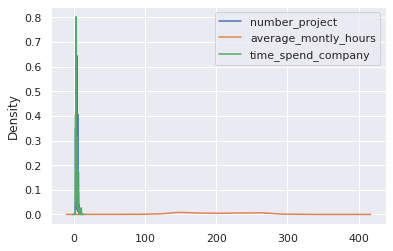

In [61]:
df.plot.kde()

In [62]:
mm = MinMaxScaler()

In [63]:
scaled_np = mm.fit_transform(df)

In [64]:
dept_np = dept_df.values

In [65]:
ark_df = ark_data[['satisfaction_level','last_evaluation','Work_accident','promotion_last_5years','salary_tf']]

In [66]:
ark_np = ark_df.values

In [67]:
feature_data = np.hstack([ark_np, scaled_np, dept_np])

In [68]:
target_data = ark_data.left

In [69]:
feature_data.shape

(14999, 18)

In [70]:
target_data.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Building Model

In [71]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
models = [ LogisticRegression(class_weight='balanced'), SGDClassifier(max_iter=10), PassiveAggressiveClassifier(max_iter=20), RandomForestClassifier(n_estimators=20)]


In [73]:
from sklearn.model_selection import train_test_split


In [74]:
trainX,testX,trainY,testY = train_test_split(feature_data,target_data)


In [75]:
for model in models:
    model.fit(trainX,trainY)
    print (model.score(testX,testY))

0.7586666666666667
0.7938666666666667
0.7592


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9914666666666667
